In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("./Cars_Multi.csv")

In [191]:
df = df[df['horsepower'] != '?'].reset_index(drop=True)
df

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,394,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,395,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,396,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,397,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<Axes: xlabel='model', ylabel='displacement'>

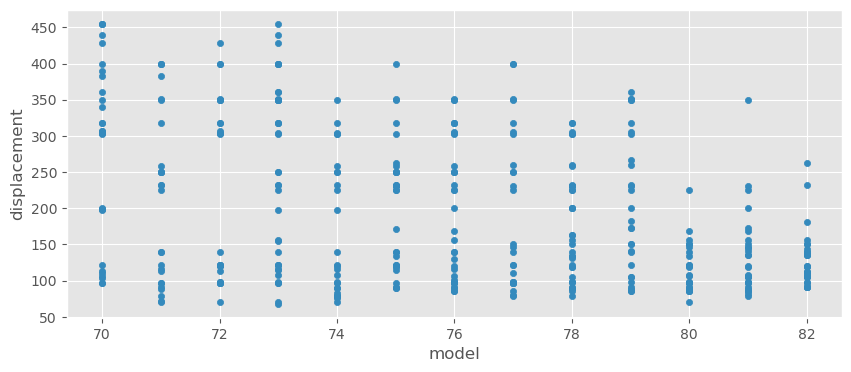

In [192]:
df.plot(kind="scatter", x="model", y="displacement")

In [283]:
round_d = (df['displacement'] / 25).round(decimals=0) * 25


yearDf = df['model']
# yearDf

newDf = pd.concat([round_d, yearDf], axis=1)

<Axes: xlabel='model'>

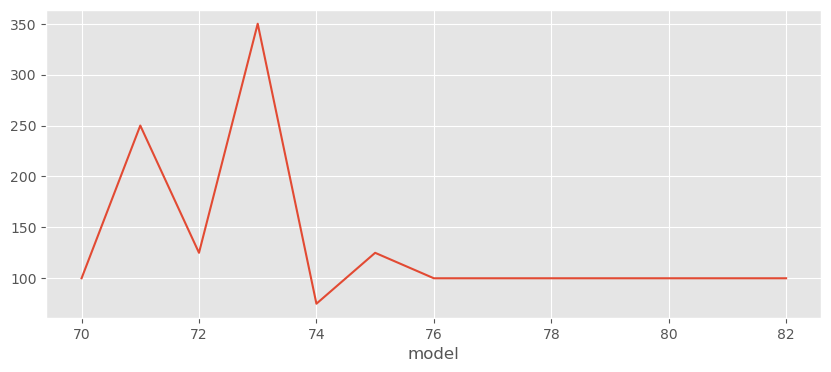

In [284]:
mode_d = newDf.groupby('model')['displacement'].apply(lambda x: x.mode().iloc[0])

mode_d.plot(kind='line')

<Axes: xlabel='model'>

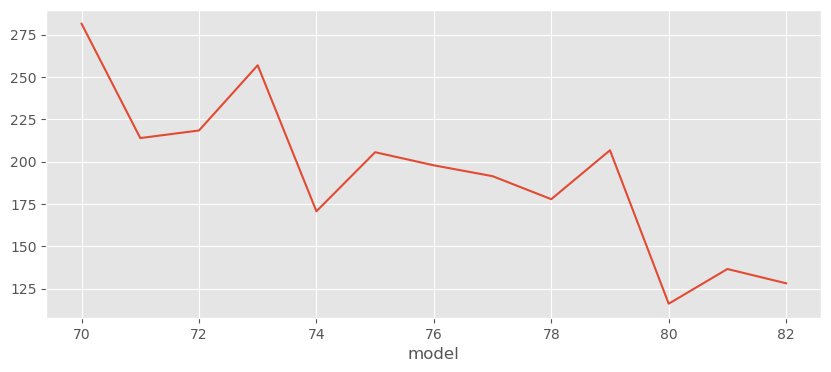

In [285]:
avg_d = df.groupby('model')['displacement'].mean()

avg_d.plot(kind='line')

In [213]:
df['engine efficiency'] = df['displacement'].astype(float) / df['horsepower'].astype(float) / df['cylinders'].astype(float)
df

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,engine efficiency
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.295192
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.265152
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.265000
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.253333
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.269643
...,...,...,...,...,...,...,...,...,...,...,...
387,394,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.406977
388,395,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0.466346
389,396,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0.401786
390,397,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0.379747


<Axes: xlabel='model', ylabel='engine efficiency'>

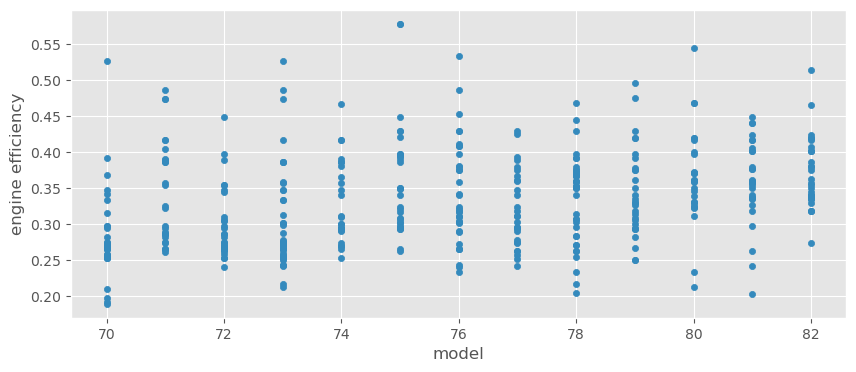

In [215]:
df.plot(kind="scatter", x="model", y="engine efficiency")

<Axes: xlabel='model'>

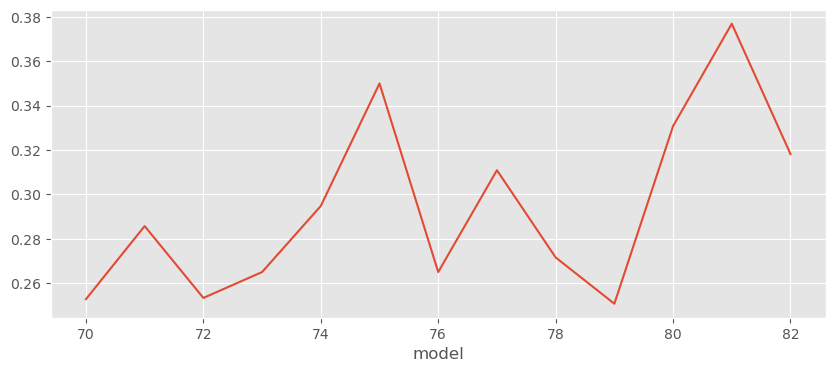

In [293]:
# yearDf
eDf = df['engine efficiency']
efficiencyDf = pd.concat([yearDf, eDf], axis=1)

df.groupby('model')['engine efficiency'].apply(lambda x: x.mode().iloc[0]).plot(kind='line')

In [297]:
mostEffecientIndex = df.groupby('model')['engine efficiency'].idxmax()
df.loc[mostEffecientIndex]

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,engine efficiency
19,20,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,0.527174
45,47,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw),0.486111
58,60,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3,0.449074
101,103,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle,0.527174
130,133,25.0,4,140.0,75,2542,17.0,74,1,chevrolet vega,0.466667
152,155,15.0,6,250.0,72,3432,21.0,75,1,mercury monarch,0.578704
198,201,18.0,6,250.0,78,3574,21.0,76,1,ford granada ghia,0.534188
232,235,24.5,4,151.0,88,2740,16.0,77,1,pontiac sunbird coupe,0.428977
242,245,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel,0.468750
297,300,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504,0.496479


In [299]:
mostMpgtIndex = df.groupby('model')['mpg'].idxmax()
df.loc[mostMpgtIndex]

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,engine efficiency
18,19,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510,0.275568
53,55,35.0,4,72.0,69,1613,18.0,71,3,datsun 1200,0.260870
80,82,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw),0.263587
116,118,29.0,4,68.0,49,1867,19.5,73,2,fiat 128,0.346939
129,132,32.0,4,71.0,65,1836,21.0,74,3,toyota corolla 1200,0.273077
179,182,33.0,4,91.0,53,1795,17.5,75,3,honda civic cvcc,0.429245
196,199,33.0,4,91.0,53,1795,17.4,76,3,honda civic,0.429245
216,219,36.0,4,79.0,58,1825,18.6,77,2,renault 5 gtl,0.340517
242,245,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel,0.468750
302,305,37.3,4,91.0,69,2130,14.7,79,2,fiat strada custom,0.329710


In [319]:
mostMpgEfficientCars = df.loc[mostMpgtIndex]

mostMpgEfficientCars.reset_index(drop=True)


,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,engine efficiency
0,19,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510,0.275568
1,55,35.0,4,72.0,69,1613,18.0,71,3,datsun 1200,0.260870
2,82,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw),0.263587
3,118,29.0,4,68.0,49,1867,19.5,73,2,fiat 128,0.346939
4,132,32.0,4,71.0,65,1836,21.0,74,3,toyota corolla 1200,0.273077
5,182,33.0,4,91.0,53,1795,17.5,75,3,honda civic cvcc,0.429245
6,199,33.0,4,91.0,53,1795,17.4,76,3,honda civic,0.429245
7,219,36.0,4,79.0,58,1825,18.6,77,2,renault 5 gtl,0.340517
8,245,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel,0.468750
9,305,37.3,4,91.0,69,2130,14.7,79,2,fiat strada custom,0.329710


<Axes: >

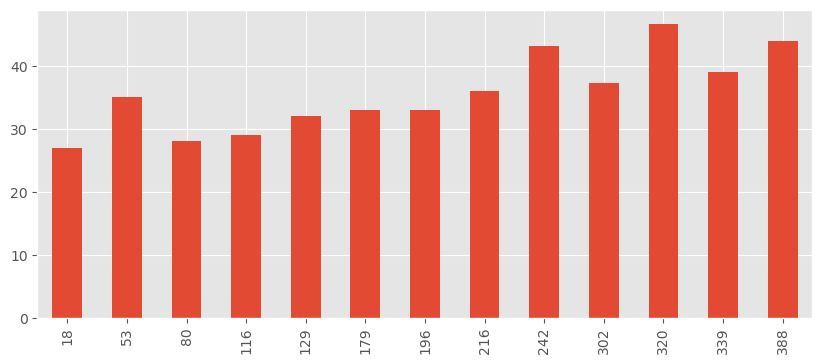

In [320]:
mostMpgEfficientCars["mpg"].plot(kind='bar', x="model")